<a href="https://colab.research.google.com/github/JYOTSANAPARKHEDKAR266/Handwritten_digit_usingCNN/blob/main/Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)
Shape of X after reshaping: (42000, 28, 28, 1)
Shape of y after one-hot encoding: (42000, 10)
X_train shape: (33600, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.8895 - loss: 0.3886 - val_accuracy: 0.9805 - val_loss: 0.0602
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.9830 - loss: 0.0564 - val_accuracy: 0.9874 - val_loss: 0.0453
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9845 - val_loss: 0.0480
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9848 - val_loss: 0.0509
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9906 - val_loss: 0.0374
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9849 - val_loss: 0.0543
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9877 - val_loss: 0.0394
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 33s 31ms/step - accuracy: 0.9972 -

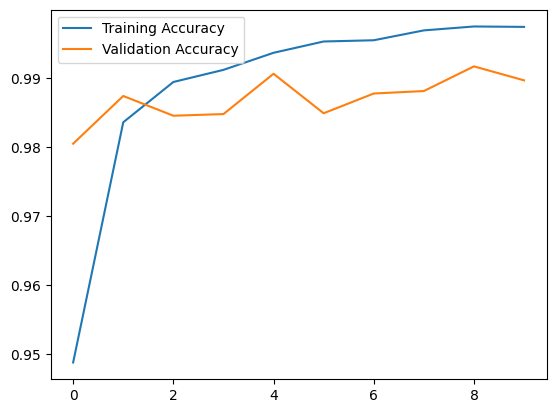

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


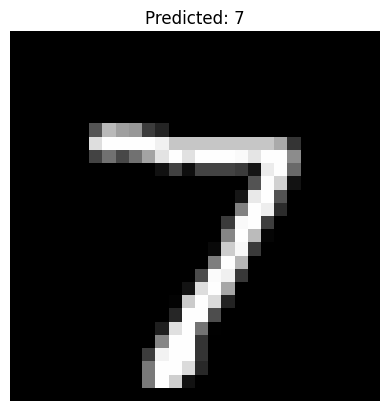

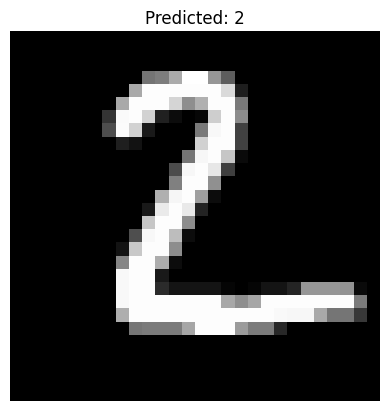

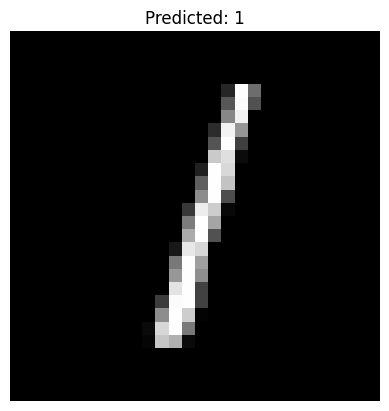

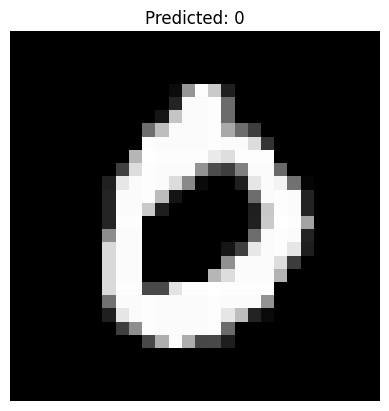

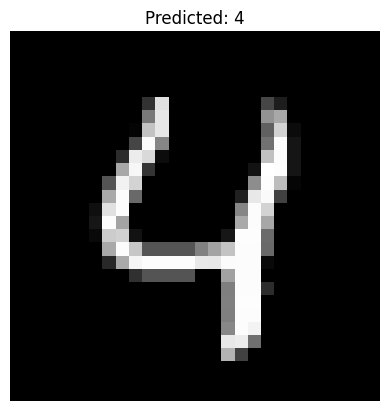

Model Accuracy on Test Set: 99.45%
Training Accuracy: 99.84%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the training data
train_data = pd.read_csv('/content/Train (1).csv')
print("Shape of train_data:", train_data.shape)

# Separate features (pixel values) from the labels
X = train_data.iloc[:, 1:].values  # Get all the pixel values (28x28 flattened)
y = train_data.iloc[:, 0].values   # Get the labels (digits 0-9)

print("Shape of X after separating features:", X.shape)

# Normalize the pixel values to be between 0 and 1
X = X / 255.0  # Normalize pixel values between 0 and 1

# Reshape the data to be in the format (num_samples, 28, 28, 1) for CNN
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

# One-hot encode the labels
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the 2D matrix into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 units for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Load the test data (ensure the test CSV file is correctly used here)
test_data = pd.read_csv('/content/Test.csv')

# Drop 'label' column
X_test = test_data.drop(columns=['label'])

# Normalize pixel values
X_test = X_test.values / 255.0   # <-- use X_test here, NOT test_data!

# Reshape to (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Predict
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

# Assuming 'Test.csv' contains labels, otherwise, ignore the following
y_true = test_data['label'].values

# Evaluate the accuracy on the test data
accuracy = accuracy_score(y_true, predicted_labels)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Evaluate the model on training data (optional)
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
